Aby lepiej zobrazować działanie algorytmu ewolucyjnego, pokazałem w jaki sposób zmienia się cała populacja na przestrzeni kilku generacji


Generation 0



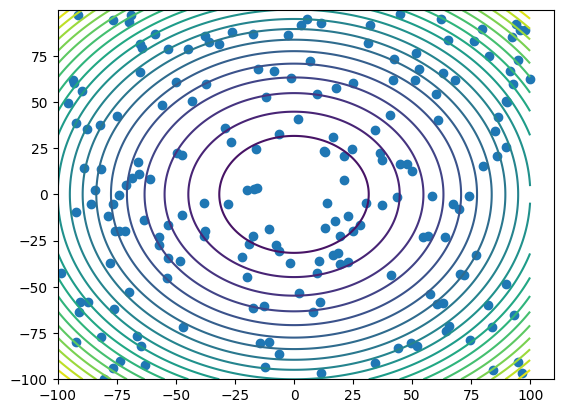

Generation 1


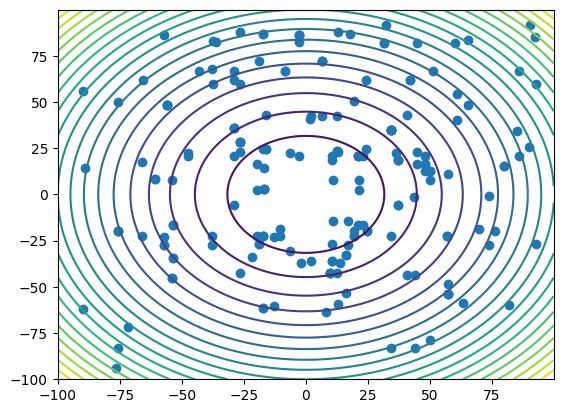


Generation 2


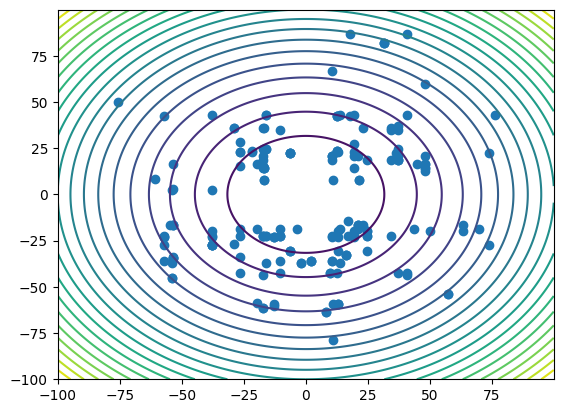


Generation 3


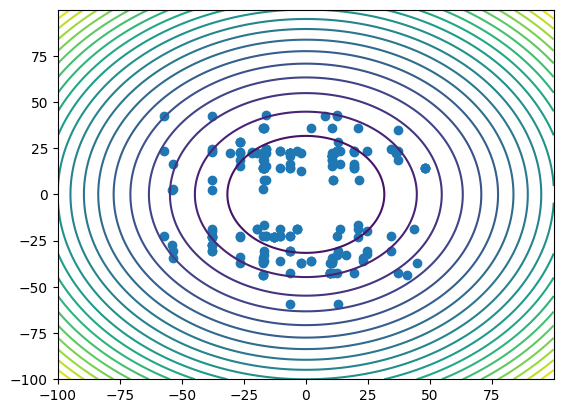


Generation 4


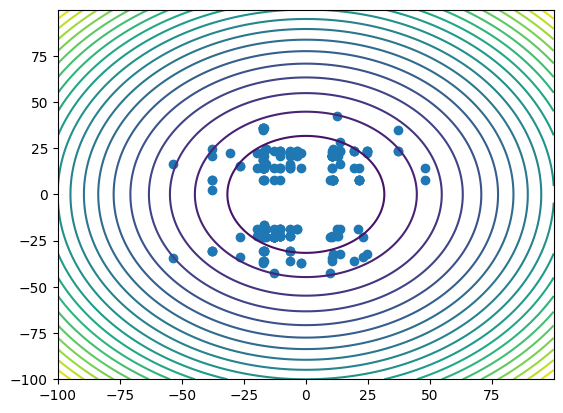


Generation 5


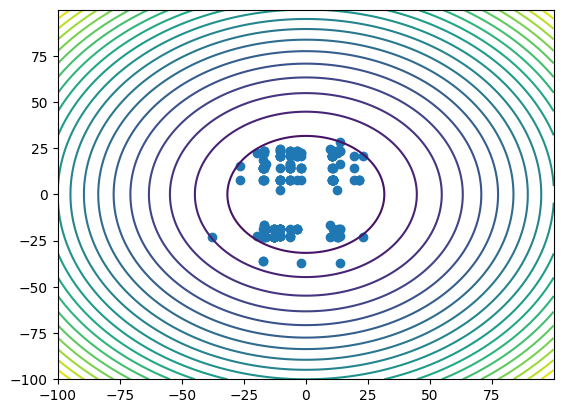


Generation 6


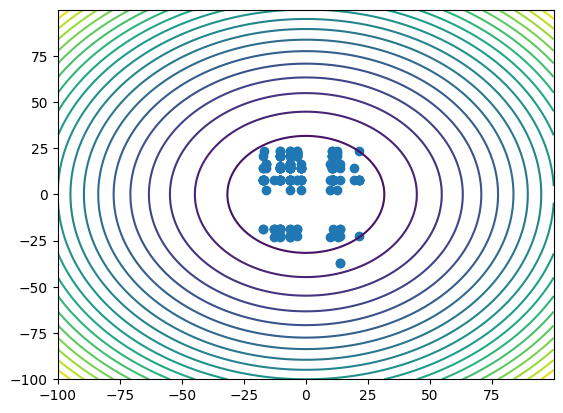


Generation 7


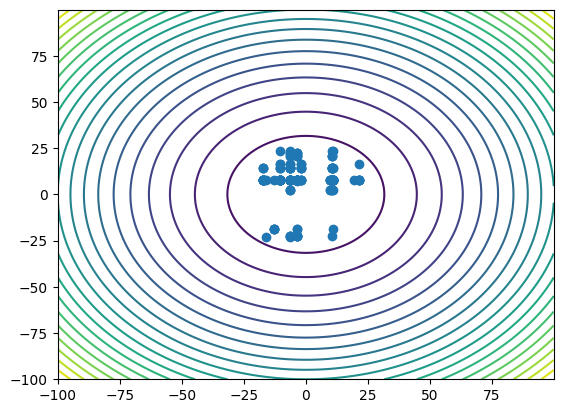


Generation 8


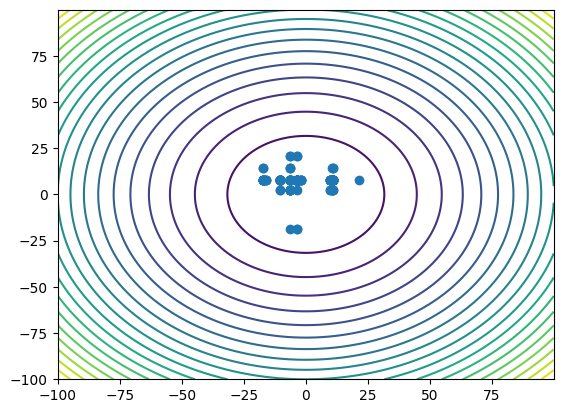


Generation 9


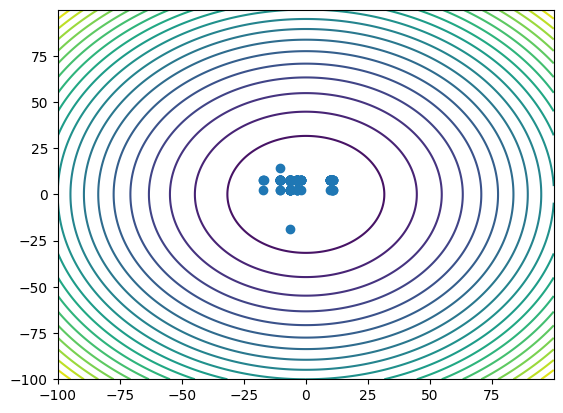


Generation 10


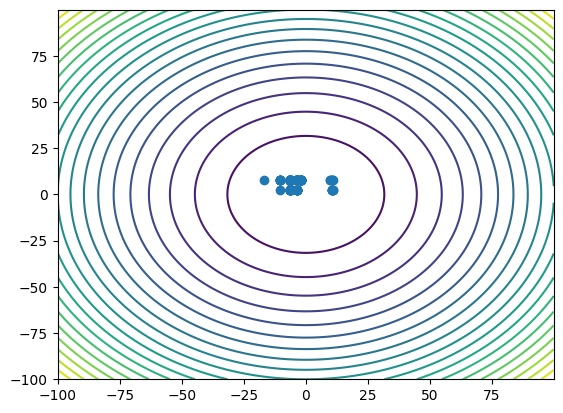


Generation 11


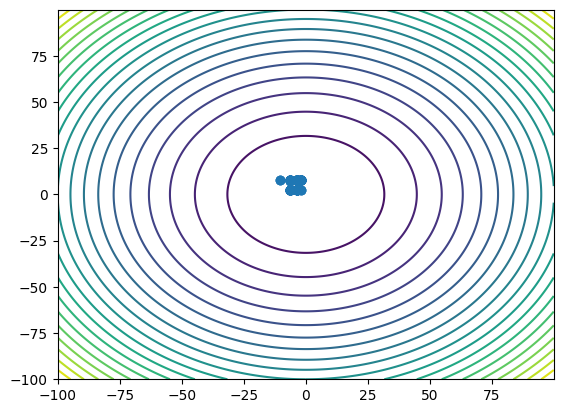


Generation 12


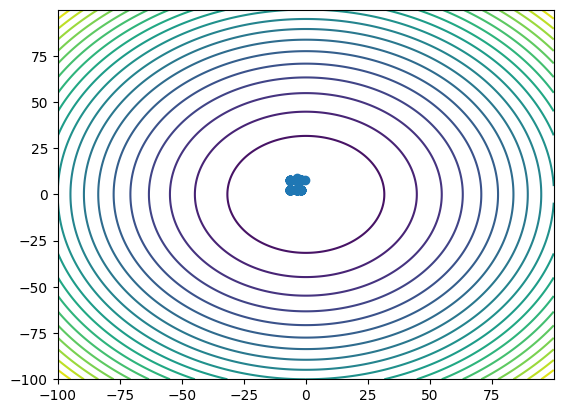


Generation 13


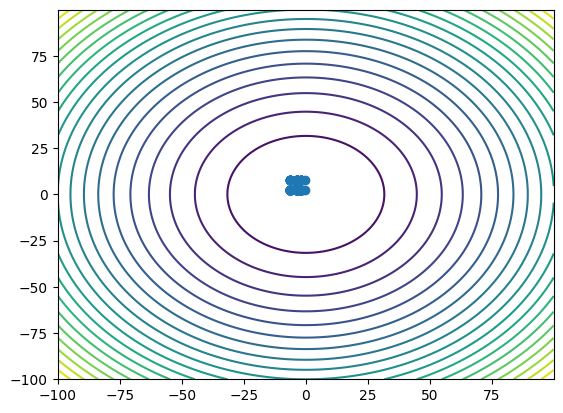


Generation 14


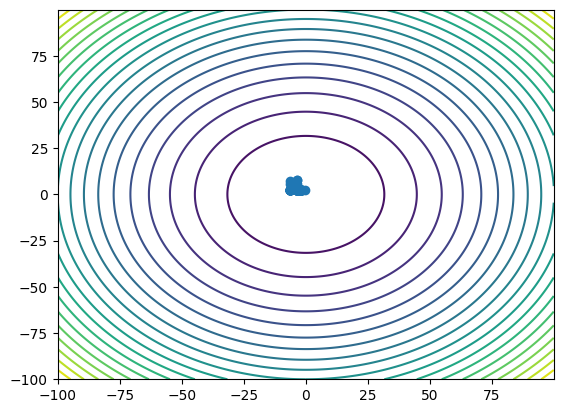


Generation 15


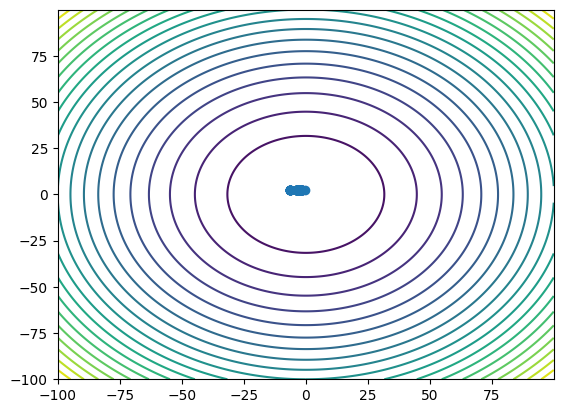

0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random


def min_max_norm(val, min_val, max_val, new_min, new_max):
    return (val - min_val) * (new_max - new_min) / (max_val - min_val) + new_min


def bin_vect_to_decimal(bin_vector):
    decimal = 0
    bit_value = 1
    for bit in bin_vector:
        decimal += bit_value*bit
        bit_value *= 2
    return decimal


def function(x):
    return 1.5 - np.exp(-x[0] ** (2) - x[1] ** (2)) - 0.5 * np.exp(-(x[0] - 1) ** (2) - (x[1] + 2) ** (2))


def function2(x):
    return x[0]**2 + x[1]**2


class Chromosome:
    def __init__(self, length, array=None):
        self.length = length
        self.array = array
        if not array:
            self.array = random.choices([0, 1], k=length)

    def decode(self, lower_bound, upper_bound, aoi):
        val = bin_vect_to_decimal(self.array[lower_bound:upper_bound])
        max_value = 2**(upper_bound - lower_bound) - 1
        return min_max_norm(val, 0, max_value, aoi[0], aoi[1])

    def mutation(self, probability):
        if random.random() <= probability:
            iter = random.randint(0, self.length-1)
            self.array[iter] = int(not self.array[iter])
        return 0

    def crossover(self, other):
        cross_point = random.randint(1, self.length-1)
        child1 = Chromosome(self.length, self.array[0:cross_point] + other.array[cross_point:self.length])
        child2 = Chromosome(self.length, other.array[0:cross_point] + self.array[cross_point:self.length])
        return random.choice([child1, child2])


class GeneticAlgorithm:
    def __init__(self, chromosome_length, obj_func_num_args, objective_function, aoi, population_size=30, tournament_size=2, mutation_probability=0.1, crossover_probability=0.8, num_steps=15):
        assert chromosome_length % obj_func_num_args == 0, "Number of bits for each argument should be equal"
        self.chromosome_lengths = chromosome_length
        self.obj_func_num_args = obj_func_num_args
        self.bits_per_arg = int(chromosome_length / obj_func_num_args)
        self.objective_function = objective_function
        self.aoi = aoi
        self.tournament_size = tournament_size
        self.mutation_probability = mutation_probability
        self.crossover_probability = crossover_probability
        self.num_steps = num_steps
        self.population_size = population_size
        self.chromosomes = [Chromosome(chromosome_length) for i in range(population_size)]
        self.trace = []

    def eval_objective_func(self, chromosome: Chromosome):
        function_args = [chromosome.decode(lower_bound=i, upper_bound=i+self.bits_per_arg, aoi=self.aoi) for i in range(0, chromosome.length, self.bits_per_arg)]
        eval = self.objective_function(function_args)
        return eval

    def mutate(self):
        for chromosome in self.chromosomes:
            chromosome.mutation(self.mutation_probability)
        return 0

    def tournament_selection(self):
        chosen_ones = []
        for i in range(self.population_size):
            fighters = random.sample(self.chromosomes, self.tournament_size)
            winner = min(fighters, key=self.eval_objective_func)
            chosen_ones.append(winner)
        return chosen_ones

    def reproduce(self, parents):
        new_population = []
        while (len(new_population) < self.population_size):
            parent1, parent2 = random.sample(parents, 2)
            if random.random() < self.crossover_probability:
                new_population.append(parent1.crossover(parent2))
            else:
                new_population.append(random.choice([parent1, parent2]))
        self.chromosomes = new_population
        return 0

    def plot_func(self):
        X = np.arange(-100, 100, 0.1)
        Y = np.arange(-100, 100, 0.1)
        X, Y = np.meshgrid(X, Y)
        Z = X**2 + Y**2
        #Z = 1.5 - np.exp(-X ** (2) - Y ** (2)) - 0.5 * np.exp(-(X - 1) ** (2) - (Y + 2) ** (2))
        plt.figure()
        plt.contour(X, Y, Z, 20)
        plt.scatter([x[0] for x in self.trace], [x[1] for x in self.trace])
        plt.show()

    def run(self):
        for chromosome in self.chromosomes:
                trace_arguments = [chromosome.decode(lower_bound=i, upper_bound=i+self.bits_per_arg, aoi=self.aoi) for i in range(0, chromosome.length, self.bits_per_arg)]
                self.trace.append(trace_arguments)
        print("Generation 0")
        print()
        self.plot_func()
        for i in range(self.num_steps):
            self.trace = []
            self.mutate()
            self.reproduce(self.tournament_selection())
            for chromosome in self.chromosomes:
                trace_arguments = [chromosome.decode(lower_bound=i, upper_bound=i+self.bits_per_arg, aoi=self.aoi) for i in range(0, chromosome.length, self.bits_per_arg)]
                self.trace.append(trace_arguments)
            print(f"Generation {i+1}")
            self.plot_func()
            print()
        return 0


algorithm = GeneticAlgorithm(1024, 2, function2, [-100, 100], 200)
algorithm.run()

